## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №21

Работа с временными рядами.  
На основании графика EUR/USD построить предсказание цены с использованием решения для анализа временных рядов. Привести график к часовому (или дневному).  
Для упрощения, считать тестовой выборкой только значение в следующий час.  
В качестве метрики использовать точность угадывания значения цены на больше/меньше от последнего значения. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#from prophet import Prophet
#from neuralprophet import NeuralProphet
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 5)

RANDOM_STATE = 42

Загрузить данные.

Набор данных содержит 1-минутные исторические внутридневные значения торгов Евро-Доллар (открытие, максимум, минимум, закрытие, объем торгов).

- Формат файла : {Date, Time, Open, High, Low, Close, Volume}
- Значения "Volume" - в миллионах базовой валюты (Евро)
- Временная зона - UTC

In [9]:
# Файл данных не содержит строки заголовков - отключим получение заголовоков из файла
# Дата и время фиксации значений содержатся в раздельных столбцах - объединим их в один общий
df = pd.read_csv('EURUSD.csv', delimiter=',', header=None, parse_dates=[[0,1]])

# Назначим символьные имена загруженым столбцам
df.rename(columns={'0_1': 'date', 2: 'open', 3:'high', 4:'low', 5:'close', 6:'volume'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1000001 non-null  datetime64[ns]
 1   open    1000001 non-null  float64       
 2   high    1000001 non-null  float64       
 3   low     1000001 non-null  float64       
 4   close   1000001 non-null  float64       
 5   volume  1000001 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 45.8 MB


In [10]:
df.head()

,date,open,high,low,close,volume
0,2016-05-26 04:38:00,1.11709,1.11713,1.11698,1.11699,60
1,2016-05-26 04:39:00,1.11700,1.11700,1.11683,1.11685,63
2,2016-05-26 04:40:00,1.11685,1.11691,1.11681,1.11690,63
3,2016-05-26 04:41:00,1.11689,1.11690,1.11683,1.11689,37
4,2016-05-26 04:42:00,1.11688,1.11690,1.11684,1.11684,34


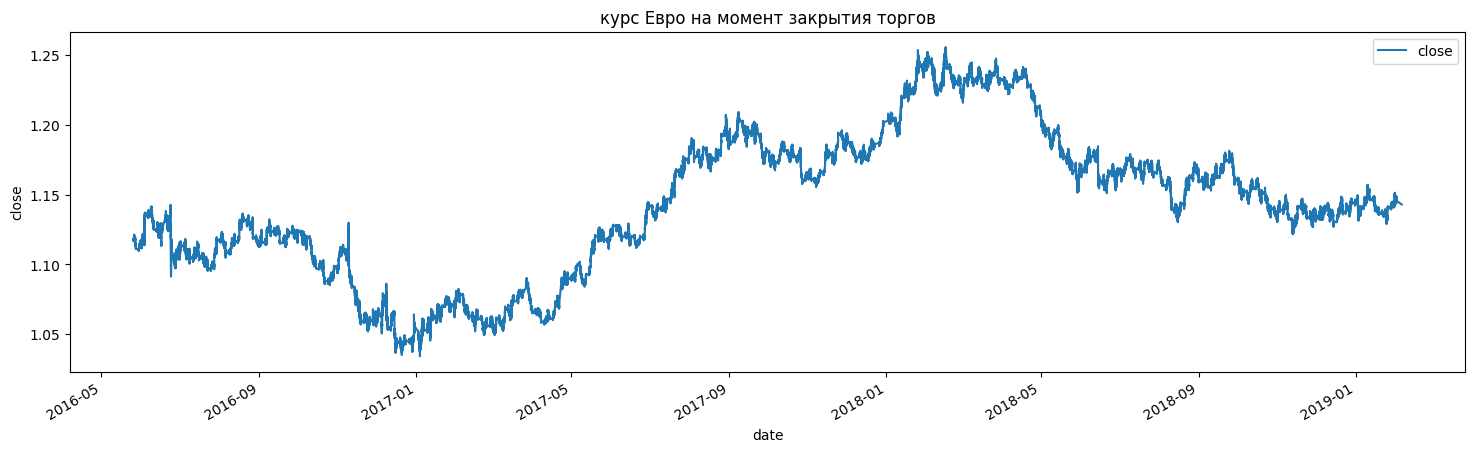

In [11]:
df.plot(x='date', y='close', title='курс Евро на момент закрытия торгов');
plt.ylabel('close rate');
plt.xlabel('date');

Подготовить данные для обучения.